# 4.2 워드클라우드

### 4.2.1 워드 클라우드를 만드는 과정

In [1]:
# 예제 4-10 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
#raw_total = pd.read_excel('./files/3_1_crawling_raw.xlsx')
raw_total = pd.read_excel('./files/Instagram_Crawling/4_1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0                         ['#성수카페', '#서울숲카페', '#묘사서울']
1                                                   []
2    ['#일상', '#데일리', '#성수동', '#아르코', '#성수카페', '#성수동...
Name: tags, dtype: object

In [2]:
# 예제 4-11 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 4.2.3 해시태그 출현 빈도 집계

In [3]:
# 예제 4-12 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [4]:
# 예제 4-13 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('', 408),
 ('#성수동맛집', 138),
 ('#성수동핫플레이스', 113),
 ('#성수동카페', 80),
 ('#성수카페', 79),
 ('#성수핫플', 79),
 ('#성수동', 76),
 ('#성수', 56),
 ('#일상', 55),
 ('#성수동맛집', 46),
 ('#성수맛집', 45),
 ('#daily', 42),
 ('#성수동핫플레이스', 39),
 ('#성수동카페', 38),
 ('#성수카페', 34),
 ('#성수동', 33),
 ('#먹스타그램', 30),
 ('#ootd', 28),
 ('#서울숲', 28),
 ('#데일리', 27),
 ('#성수동카페거리', 27),
 ('#성수동데이트', 24),
 ('#성수맛집', 24),
 ('#좋아요', 23),
 ('#성수동핫플', 23),
 ('#맞팔', 22),
 ('#성수핫플', 22),
 ('#일상', 21),
 ('#서울숲맛집', 21),
 ('#데일리룩', 20),
 ('#좋아요반사', 20),
 ('#맛스타그램', 19),
 ('#카페', 18),
 ('#selfie', 18),
 ('#소통', 18),
 ('#한남동맛집', 18),
 ('#카페스타그램', 17),
 ('#뚝섬', 16),
 ('#서울', 15),
 ('#데이트', 15),
 ('#소통', 15),
 ('#성수', 15),
 ('#맞팔', 15),
 ('#청담맛집', 15),
 ('#홍대맛집', 15),
 ('#좋반', 14),
 ('#폰케이스', 14),
 ('#명품케이스', 14),
 ('#합정맛집', 14),
 ('#오오티디', 13)]

In [5]:
tag_total_selected = []
for tag in tags_total:
    tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)


[('', 408),
 ('#성수동맛집', 138),
 ('#성수동핫플레이스', 113),
 ('#성수동카페', 80),
 ('#성수카페', 79),
 ('#성수핫플', 79),
 ('#성수동', 76),
 ('#성수', 56),
 ('#일상', 55),
 ('#성수동맛집', 46)]

### 4.2.4 막대차트로 해시태그 살펴보기

In [6]:
# 예제 4-15 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [7]:
# 예제 4-16 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

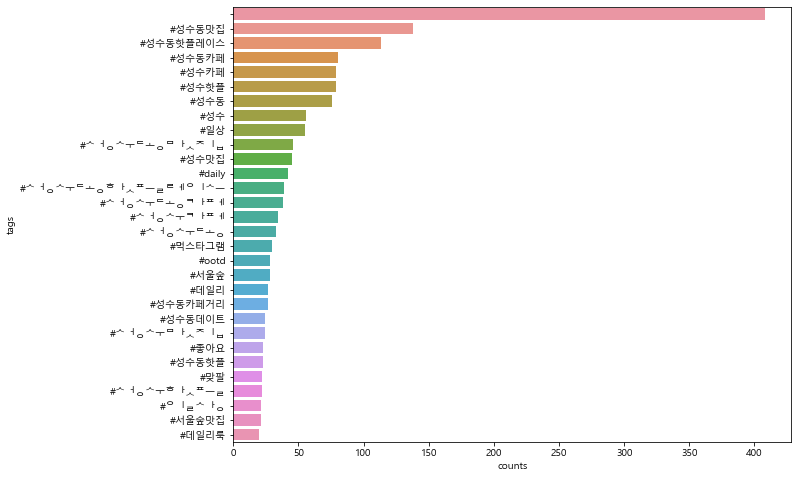

In [8]:
# 예제 4-17 막대 차트 그리기
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

### 4.2.5 워드 클라우드 그리기

In [9]:
#!pip install wordcloud

In [10]:
# 예제 4-18 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


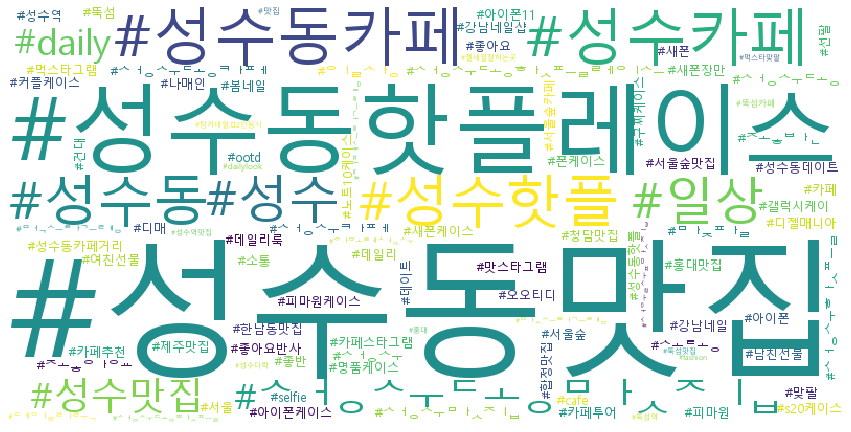

In [11]:
# 예제 4-19 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/Instagram_Crawling/4_2_tag-wordcloud.png')  